In [49]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from acquire import acquire_wine

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
df = acquire_wine()

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:
# return how many 0 there is in each numerical columns in df
zeros_count = df.select_dtypes(include=['number']).eq(0).sum()
print(zeros_count)

fixed acidity             0
volatile acidity          0
citric acid             151
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


In [7]:
df_quality = df.groupby('quality').size()
df_quality

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


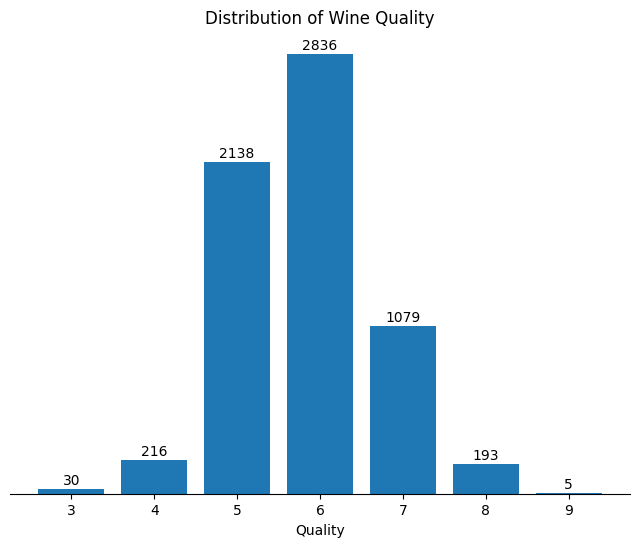

In [36]:
quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ax = plt.bar(quality_counts.index, quality_counts.values)

# Add value counts on top of each bar
for i, v in enumerate(quality_counts.values):
    plt.text(quality_counts.index[i], v + 10, str(v), ha='center', va='bottom')


# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlabel('Quality')
plt.title('Distribution of Wine Quality')
plt.xticks(quality_counts.index)
plt.show()

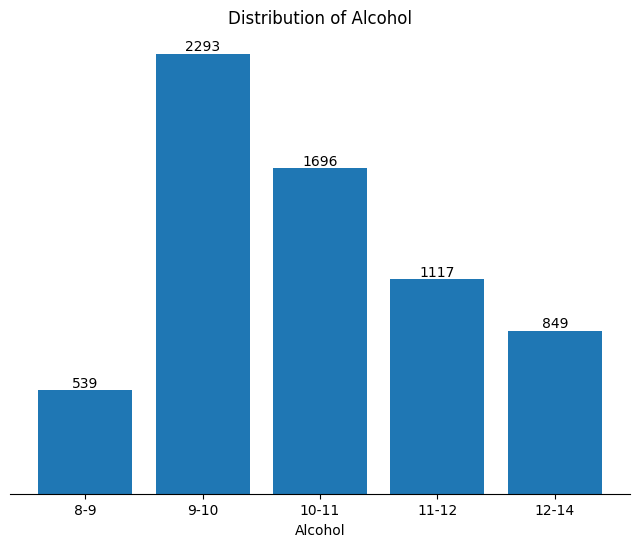

In [47]:
# Define the bin edges and labels
bin_edges = [8, 9, 10, 11, 12, 14]
bin_labels = ['8-9', '9-10', '10-11', '11-12', '12-14']

# Bin the 'alcohol' values
df['alcohol_bins'] = pd.cut(df['alcohol'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Count the values in each bin
alcohol_counts = df['alcohol_bins'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ax = plt.bar(alcohol_counts.index, alcohol_counts.values)

# Adding value counts on top of each bar
for i, count in enumerate(alcohol_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Removing the y-axis
plt.gca().get_yaxis().set_visible(False)

# Removing left, right, and top lines of the current axes
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlabel('Alcohol')
plt.title('Distribution of Alcohol')
plt.xticks(alcohol_counts.index)
plt.show()


Is alcohol normally distributed?

In [57]:
statistic, p_value = stats.shapiro(df['alcohol'])

if p_value > 0.05:
    print("Alcohol appears to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")
else:
    print("Alcohol does not appear to be normally distributed (p-value =", p_value, " s-value=",statistic, ")")


Alcohol does not appear to be normally distributed (p-value = 2.9630456028148257e-41  s-value= 0.9535516500473022 )


H0: There is no statistically significant monotonic relationship between the quality of the wine and the alcohol content.

Ha: There is a sstatistically significant monotonic relationship between the quality of the wine and the alcohol content.

In [53]:
# Assuming you have a DataFrame named df with columns 'quality' and 'alcohol'
spearman_corr, p_value = stats.spearmanr(df['quality'], df['alcohol'])

# Interpret the results
alpha = 0.05  # Set your desired significance level

if p_value < alpha:
    print(f"There is a statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")
else:
    print(f"There is no statistically significant Spearman's rank correlation (p-value = {p_value:.4f}, corr = {spearman_corr:.4f}).")


There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = 0.4469).


In [31]:
import pandas as pd
import scipy.stats as stats

# Create an empty DataFrame to store the ANOVA results
anova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value'])

# Perform ANOVA for each numerical column
for column in df.columns:
    if column != 'quality' and df[column].dtype != 'object':  # Exclude non-numeric and the 'quality' column
        group_data = [group[column] for name, group in df.groupby('quality')]
        f_statistic, p_value = stats.f_oneway(*group_data)
        anova_results = pd.concat([anova_results, pd.DataFrame({'Feature': [column], 'F-statistic': [f_statistic], 'p-value': [p_value]})], ignore_index=True)

# Print the ANOVA results
print(anova_results)

                 Feature  F-statistic        p-value
0          fixed acidity     8.004193   1.258439e-08
1       volatile acidity    96.674022  8.168059e-117
2            citric acid     9.310199   3.443125e-10
3         residual sugar     9.111367   5.969040e-10
4              chlorides    50.849719   1.953578e-61
5    free sulfur dioxide    14.939170   4.774295e-17
6   total sulfur dioxide     7.716088   2.768378e-08
7                density   136.951236  6.581609e-164
8                     pH     2.021462   5.931925e-02
9              sulphates     4.325773   2.313182e-04
10               alcohol   320.593448   0.000000e+00


In [22]:
# Create an empty DataFrame to store the ANOVA results
anova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value', 'Hypothesis'])

# Perform ANOVA for each numerical column
for column in df.columns:
    if column != 'quality' and df[column].dtype != 'object':  # Exclude non-numeric and the 'quality' column
        group_data = [group[column] for name, group in df.groupby('quality')]
        f_statistic, p_value = stats.f_oneway(*group_data)
        
        # Determine whether to "Reject" or "Fail to Reject" the null hypothesis
        if p_value < 0.05:
            hypothesis = "Reject"
        else:
            hypothesis = "Fail to Reject"
        
        anova_results = pd.concat([anova_results, pd.DataFrame({'Feature': [column], 'F-statistic': [f_statistic], 'p-value': [p_value], 'Hypothesis': [hypothesis]})], ignore_index=True)
        
        anova_results = anova_results.sort_values(by='F-statistic', ascending=False)

# Print the ANOVA results with the hypothesis decision
print(anova_results)

                 Feature  F-statistic        p-value      Hypothesis
10               alcohol   320.593448   0.000000e+00          Reject
0                density   136.951236  6.581609e-164          Reject
1       volatile acidity    96.674022  8.168059e-117          Reject
2              chlorides    50.849719   1.953578e-61          Reject
3    free sulfur dioxide    14.939170   4.774295e-17          Reject
4            citric acid     9.310199   3.443125e-10          Reject
5         residual sugar     9.111367   5.969040e-10          Reject
6          fixed acidity     8.004193   1.258439e-08          Reject
7   total sulfur dioxide     7.716088   2.768378e-08          Reject
8              sulphates     4.325773   2.313182e-04          Reject
9                     pH     2.021462   5.931925e-02  Fail to Reject


In [19]:
import pandas as pd

# Assuming df is your DataFrame

# Exclude non-numeric columns ('type' in this case)
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract the correlation values for the "quality" column
correlation_with_quality = correlation_matrix["quality"]

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Feature': correlation_matrix.columns, 'Correlation with Quality': correlation_with_quality})

# Sort the DataFrame by the absolute correlation values in descending order
result_df = result_df.iloc[(-result_df['Correlation with Quality'].abs()).argsort()]

# Display the result DataFrame
print(result_df)


                                   Feature  Correlation with Quality
quality                            quality                  1.000000
alcohol                            alcohol                  0.444319
density                            density                 -0.305858
volatile acidity          volatile acidity                 -0.265699
chlorides                        chlorides                 -0.200666
citric acid                    citric acid                  0.085532
fixed acidity                fixed acidity                 -0.076743
free sulfur dioxide    free sulfur dioxide                  0.055463
total sulfur dioxide  total sulfur dioxide                 -0.041385
sulphates                        sulphates                  0.038485
residual sugar              residual sugar                 -0.036980
pH                                      pH                  0.019506


In [20]:
# Sort the DataFrame by the absolute correlation values in descending order
result_df_descending = result_df.sort_values(by='Correlation with Quality', ascending=False)
print(result_df_descending)

                                   Feature  Correlation with Quality
quality                            quality                  1.000000
alcohol                            alcohol                  0.444319
citric acid                    citric acid                  0.085532
free sulfur dioxide    free sulfur dioxide                  0.055463
sulphates                        sulphates                  0.038485
pH                                      pH                  0.019506
residual sugar              residual sugar                 -0.036980
total sulfur dioxide  total sulfur dioxide                 -0.041385
fixed acidity                fixed acidity                 -0.076743
chlorides                        chlorides                 -0.200666
volatile acidity          volatile acidity                 -0.265699
density                            density                 -0.305858
